In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles, NBodySimulator
from nbody import load_files, save_movie
from numba import jit,njit,set_num_threads

In [2]:
# Uncomment the following line to install required packages if needed

#!conda install -y -c conda-forge ffmpeg

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/synpu/anaconda3/envs/comphys

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.2.1              |       h0d3ecfb_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following packages will be UPDATED:

  openssl                                  3.2.1-h0d3ecfb_0 --> 3.2.1-h0d3ecfb_1 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/osx-arm64::certifi-2024.2.2~ --> conda-forge/noarch::certifi-2024.2.2-pyhd8ed1ab_0 



                                                                                
Prepari

# N-Body Simulation

In this notebook, we will test the `NBodySimulator` class in `./nbody/simulator.py`. 

In [2]:
# Set the number of threads to use for numba
nthreads = 1
set_num_threads(nthreads)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Exercise 1: The Sun-Earth System

The first test is to implment the Sun-Earth system, which is a two body system. We need to make sure that you could simulate a circular motion first.

## Step 1. The initial condition

Copy the initial condition of the Earth-Sun system from `project2_demo1.ipynb`.

In [3]:
# TODO:
sun_mass = 1.989e30 # kg
earth_mass = 5.972e24 # kg
separation = 1.496e11 # m
period = 3.154e7 # s
r_sun = separation * earth_mass / (sun_mass + earth_mass)
r_earth = separation * sun_mass / (sun_mass + earth_mass)
vy_sun = 2 * np.pi * r_sun / period
vy_earth = 2 * np.pi * r_earth / period

pts = Particles(N=2)
pts.masses = np.array([[sun_mass], [earth_mass]])
pts.positions = np.array([[-r_sun, 0, 0], [r_earth, 0, 0]])
pts.velocities = np.array([[0, -vy_sun, 0], [0, vy_earth, 0]])
pts.accelerations = np.zeros((2, 3))
pts.tags = np.array([1, 2])


## Step 2. N-body simulation

Make sure you have implmented the below two methods `setup()` and `evolve()`. Run the n-body simulation by:

In [4]:
simulation = NBodySimulator(particles=pts)
simulation.setup(G=6.674e-11,rsoft=1e9,method='euler', io_freq=30)
simulation.evolve(dt=8640, tmax=365*86400)

Times: 0 dt: 8640
Times: 8640 dt: 8640
Times: 17280 dt: 8640
Times: 25920 dt: 8640
Times: 34560 dt: 8640
Times: 43200 dt: 8640
Times: 51840 dt: 8640
Times: 60480 dt: 8640
Times: 69120 dt: 8640
Times: 77760 dt: 8640
Times: 86400 dt: 8640
Times: 95040 dt: 8640
Times: 103680 dt: 8640
Times: 112320 dt: 8640
Times: 120960 dt: 8640
Times: 129600 dt: 8640
Times: 138240 dt: 8640
Times: 146880 dt: 8640
Times: 155520 dt: 8640
Times: 164160 dt: 8640
Times: 172800 dt: 8640
Times: 181440 dt: 8640
Times: 190080 dt: 8640
Times: 198720 dt: 8640
Times: 207360 dt: 8640
Times: 216000 dt: 8640
Times: 224640 dt: 8640
Times: 233280 dt: 8640
Times: 241920 dt: 8640
Times: 250560 dt: 8640
Times: 259200 dt: 8640
Times: 267840 dt: 8640
Times: 276480 dt: 8640
Times: 285120 dt: 8640
Times: 293760 dt: 8640
Times: 302400 dt: 8640
Times: 311040 dt: 8640
Times: 319680 dt: 8640
Times: 328320 dt: 8640
Times: 336960 dt: 8640
Times: 345600 dt: 8640
Times: 354240 dt: 8640
Times: 362880 dt: 8640
Times: 371520 dt: 8640
Times

## Step 3. Visualization

Check the code in `./nobdy/visualization.py`.
Data loader is implmented in the function `load_files`.

In [5]:
fns = load_files('nbody')
print(fns)

['data_nbody/nbody_000000.dat', 'data_nbody/nbody_000030.dat', 'data_nbody/nbody_000060.dat', 'data_nbody/nbody_000090.dat', 'data_nbody/nbody_000120.dat', 'data_nbody/nbody_000150.dat', 'data_nbody/nbody_000180.dat', 'data_nbody/nbody_000210.dat', 'data_nbody/nbody_000240.dat', 'data_nbody/nbody_000270.dat', 'data_nbody/nbody_000300.dat', 'data_nbody/nbody_000330.dat', 'data_nbody/nbody_000360.dat', 'data_nbody/nbody_000390.dat', 'data_nbody/nbody_000420.dat', 'data_nbody/nbody_000450.dat', 'data_nbody/nbody_000480.dat', 'data_nbody/nbody_000510.dat', 'data_nbody/nbody_000540.dat', 'data_nbody/nbody_000570.dat', 'data_nbody/nbody_000600.dat', 'data_nbody/nbody_000630.dat', 'data_nbody/nbody_000660.dat', 'data_nbody/nbody_000690.dat', 'data_nbody/nbody_000720.dat', 'data_nbody/nbody_000750.dat', 'data_nbody/nbody_000780.dat', 'data_nbody/nbody_000810.dat', 'data_nbody/nbody_000840.dat', 'data_nbody/nbody_000870.dat', 'data_nbody/nbody_000900.dat', 'data_nbody/nbody_000930.dat', 'data_n

Modify the matplotlib script 

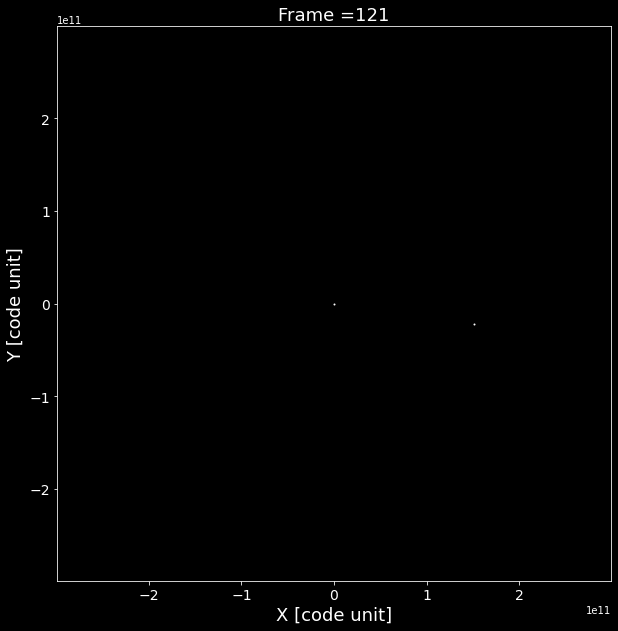

In [6]:
au = 1.496e11
save_movie(fns, lengthscale=2*au,filename='nbody_earth_sun.mp4', fps=10)

# Exercise 2: N-Body simulation

Now, let's test our n-body solver with more particles. Copy the initial condition from the Exercise 2 in `project2_demo1.ipynb`.

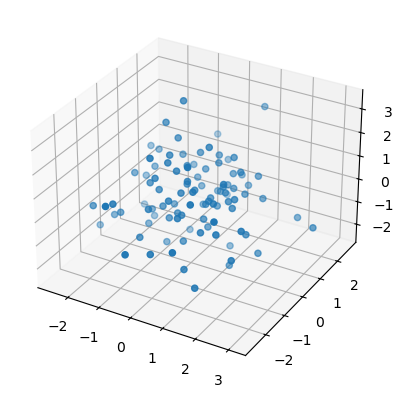

In [2]:
# TODO
num_particles = 100
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 10/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

# visualize the system
pts.draw(dim=3)

## Step 2. Simulation.

Visualize the system but use dimensionless units. Set `G=1` and `rsoft=0.001`.

In [3]:
simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,rsoft=0.001,method='euler', io_freq=10, io_header='cluster')
simulation.evolve(dt=0.01, tmax=1)

Times: 0 dt: 0.01
Times: 0.01 dt: 0.01
Times: 0.02 dt: 0.01
Times: 0.03 dt: 0.01
Times: 0.04 dt: 0.01
Times: 0.05 dt: 0.01
Times: 0.060000000000000005 dt: 0.01
Times: 0.07 dt: 0.01
Times: 0.08 dt: 0.01
Times: 0.09 dt: 0.01
Times: 0.09999999999999999 dt: 0.01
Times: 0.10999999999999999 dt: 0.01
Times: 0.11999999999999998 dt: 0.01
Times: 0.12999999999999998 dt: 0.01
Times: 0.13999999999999999 dt: 0.01
Times: 0.15 dt: 0.01
Times: 0.16 dt: 0.01
Times: 0.17 dt: 0.01
Times: 0.18000000000000002 dt: 0.01
Times: 0.19000000000000003 dt: 0.01
Times: 0.20000000000000004 dt: 0.01
Times: 0.21000000000000005 dt: 0.01
Times: 0.22000000000000006 dt: 0.01
Times: 0.23000000000000007 dt: 0.01
Times: 0.24000000000000007 dt: 0.01
Times: 0.25000000000000006 dt: 0.01
Times: 0.26000000000000006 dt: 0.01
Times: 0.2700000000000001 dt: 0.01
Times: 0.2800000000000001 dt: 0.01
Times: 0.2900000000000001 dt: 0.01
Times: 0.3000000000000001 dt: 0.01
Times: 0.3100000000000001 dt: 0.01
Times: 0.3200000000000001 dt: 0.01


It is VERY slow !!!!

Beacuse the accerlation calculations requires order of NxN calculations!
Could we improve it?

First, we should avoid the two "for" loops in the calculation using python.\
Second, we have many cup cores in our machine. Could we parallelize it?

# `numba`

Step 1. Take out the function to calculate the accerlation from the class into a pure function that only counts math calculations (aka. a kernel).

Step 2. Use the `numba`'s `@jit` micro. 

Results: In my experiments. I got roughly x140 speed up with the @jit(nopython=True). 

Step 3. Try using `@njit` and `prange` in numba.

## Performance

### Strong Scaling Test

**Strong scaling**: The number of processors is increased while the problem size remains constant.\
We could use `%timeit` to measure the performance. Let's run 1000 particles for 10 step.

In [2]:
num_particles = 1000
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 10/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,rsoft=0.001,method='euler', io_screen=False, io_freq=0, io_header='cluster')
#simulation.evolve(dt=0.02, tmax=1)

In [3]:
# Set the number of threads to use for numba
nthreads = 8
set_num_threads(nthreads)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
%timeit simulation.evolve(dt=0.02, tmax=0.2)

Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
115 ms ± 34.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


without numba
3.57 s ± 89.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1 core: 106 ms ± 33.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2 core: 127 ms ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3 core: 105 ms ± 31.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4 core: 103 ms ± 30.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8 core: 115 ms ± 34.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

**Kuo-Chuan's measurements**

CPU: 3 GHz 10-Core Intel Xeon W

1000 particles. 10 steps.

without `numba`: 5min 31s ± 2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
with `numba`:
* 1 core (`jit`): 17.7 s ± 328 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 1 core (`njit`): 10.4 s ± 337 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 2 cores: 7.61 s ± 52.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 6 cores: 3.35 s ± 50.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 10 cores: 2.12 s ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 12 cores: 1.95 s ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 16 cores: 1.64 s ± 46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 20 cores: 1.49 s ± 55.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
threads = [1,2,6,10,12,16,20]                     # Replace it to your measured values
times = [10.4, 7.61, 3.35, 2.12, 1.95, 1.64,1.49] # Replace it to your measured values
ideal = times[0]/np.array(threads)
plt.loglog(threads, times)
plt.loglog(threads, ideal, '--')
plt.xlabel('Number of threads')
plt.ylabel('Time for 10 iterations (s)')
plt.legend(['Measured', 'Ideal'])
plt.title('Strong scaling')
plt.show()

## Weak Scaling Test

In N-body simulation, the problem size is proportional to $N^2$.\
**Weaking scaling** test measures the scaling with the same problem size per thread (core).

In [ ]:
num_particles = int(225*np.sqrt(nthreads))
print("N =", num_particles, ", threads = ", nthreads)
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 10/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,rsoft=0.001,method='RK4', io_screen=False, io_freq=0, io_header='cluster')

In [ ]:
%timeit simulation.evolve(dt=0.02, tmax=0.2)

Kuo-Chuan's measurements

* N = 225 threads =  1: 537 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* N = 450 threads =  4: 981 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* N = 636 threads =  8: 1.07 s ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* N = 779 threads =  12: 1.17 s ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* N = 900 threads =  16: 1.29 s ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* N = 1006 threads =  20: 1.51 s ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
threads = [1,4,8,12,16,20]                     # Replace it to your measured values
times = [0.537, 0.981, 1.07, 1.17, 1.29, 1.51] # Replace it to your measured values
ideal = 0.981 * np.ones(len(threads))
plt.plot(threads, times)
plt.plot(threads, ideal, '--')
plt.xlabel('Number of threads')
plt.ylabel('Time for 10 iterations (s)')
plt.legend(['Measured', 'Ideal'])
plt.title('Weak scaling')
plt.show()